## Decision tree classifier

A decision tree classifier attempts to group a set of observations into classes based on logical criteria.
An example of observations and classes is the table below

![Data table](dt-ex1.png)

The last column (Play?) describes the two classes, yes or no (for playing tennis).
The other columns are weather observations which are used to decide wether tennis could be played or not.
We can use a tree structure to systematically check the observations in order to arrive at a decision.
The figure below shows an example using the table above

![Decision Tree](dt-ex2.png)

The process of constructing the tree can of course be done manually, but we are looking for an automated process. One way of doing that is first look at the entire dataset and try to find out to what extent
decisison can be made with respect to how it can be split up into classes. Several methods have been proposed,
one of them is to use the statistical Gini index.
Assume we have n classes and a single observation. The probability for a random observation to be put into
class no $i$ is set to $p_i$. The probability for a random variable to not belong to class no $i$ is 
$1-p_i$. The combined probability for a random observation to be put into class no $i$ and not belong to that class is $p_i(1-p_i)$. The Gini index G is then found by summing over all classes:

\begin{eqnarray}
G = \sum_{i=1}^n p_i(1-p_i) = \sum_{i=1}^n p_i -\sum_{i=1}^n p^2_i = 1-\sum_{i=1}^n p^2_i.
\end{eqnarray}

Now let us look at a slightly simpler example. Below is a table containing the observations "Humidity" and
"Wind". The classes to be determined from the observations are "Sunny" and "Rain".

![Weather observations](dt-rain.png)

The Gini index for the table above could the be calculated as:

 1. Probability that an observation belongs to the rain class : $p_1 = 6/10$.
 2. Probability that an observation belongs to the sunny class: $p_2 = 4/10$.

The Gini index is then

\begin{eqnarray}
G = 1-\left(6/10)\right)^2 - \left(4/10\right)^2 = 0.48
\end{eqnarray}

The main idea of the tree algorithm is to split the dataset into two separate datasets. For each
dataset the Gini index is computed. A combined Gini index is computed by an average of the two Gini indexes weigthed by the number of observations in each dataset.
For the split shown in the figure below the Gini index for the right dataset, with only one member, is zero and the Gini index for the left dataset is 0.44 resulting in an average Gini index of 0.44
This is lower than the Gini index for the total dataset (0.48), so this is a potential possible split.
The Gini index and the value of the wind parameter is then recorded as the (for now) best Gini index and
the threshold value.
The algorithm then proceeds to evaluate the other observations one by one and the observation resulting
in the best Gini index is kept, together with the value of the observation.
The algorithm then proceeds by evaluating all possible splits of the dataset, keeping in the end the split with the lowest Gini index.

The whole process is repeated for each of the two datasets created by the split, eventually resulting in a
complete tree structure where each node have an observation and a threshold value. 

The tree can be used to decide wether it was rainy or sunny on a given day by evaluating the condition
in each node.



![Weather observations](dt-split.png)





array([1.])

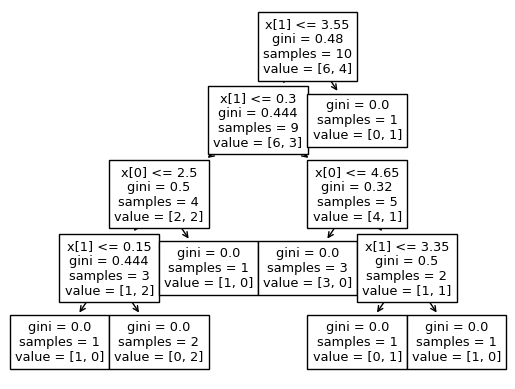

In [3]:
import numpy as np
from sklearn import tree


# Load the data table
n=10
m=2
X = np.zeros((n,m))
Y = np.zeros(n)

# Classes
rainy=0
sunny=1

# Humidity
X[0,0] = 5.1
X[1,0] = 4.7
X[2,0] = 4.6
X[3,0] = 5.0
X[4,0] = 3.4
X[5,0] = 1.5
X[6,0] = 1.6
X[7,0] = 1.5
X[8,0] = 3.9
X[9,0] = 1.5

# Wind
X[0,1] = 3.5
X[1,1] = 3.2
X[2,1] = 1.5
X[3,1] = 3.6
X[4,1] = 0.2
X[5,1] = 0.1
X[6,1] = 0.2
X[7,1] = 0.4
X[8,1] = 0.4
X[9,1] = 0.2

#Class
Y[0] = rainy
Y[1] = sunny
Y[2] = rainy
Y[3] = sunny
Y[4] = rainy
Y[5] = rainy
Y[6] = sunny
Y[7] = rainy
Y[8] = rainy
Y[9] = sunny

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

tree.plot_tree(clf)

clf.predict([[5.0, 3.6]])
